<a href="https://colab.research.google.com/github/oldgreg07/Journey-to-the-Center-of-Python/blob/main/ExploringPandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/LearnPythonWithFantasyFootball/master/2022/06-Data%20Munging/01-Fantasy%20Pros%20Projections%20-%20(2022.08.25).csv')

scoring_weights = {
    'receptions': 1, #PPR
    'receiving_yds': 0.1,
    'receiving_td': 6,
    'FL': 2, #fumbles lost
    'rushing_yds': 0.1,
    'rushing_td': 6,
    'passing_yds': 0.04,
    'passing_td': 6,
    'int': -2
}

In [24]:
df['FantasyPoints'] = (
    df['Receptions']*scoring_weights['receptions'] + df['ReceivingYds']*scoring_weights['receiving_yds'] + \
    df['ReceivingTD']*scoring_weights['receiving_td'] + df['FL']*scoring_weights['FL'] + \
    df['RushingYds']*scoring_weights['rushing_yds'] + df['RushingTD']*scoring_weights['rushing_td'] + \
    df['PassingYds']*scoring_weights['passing_yds'] + df['PassingTD']*scoring_weights['passing_td'] + \
    df['Int']*scoring_weights['int'] )

In [26]:
df.head()
#scroll all the way to the right to see that the "Fantasy Points" column has been added.

,Player,Team,Pos,RushingAtt,RushingYds,RushingTD,Receptions,ReceivingYds,ReceivingTD,FL,...,FumblesRecovered,FumblesForced,DefensiveTDs,SafetysForced,PointsAllowed,YardsAgainst,FieldGoalsMade,FieldGoalsAttempted,ExtraPointsMade,FantasyPoints
0,Jonathan Taylor,IND,RB,325.4,1600.1,14.8,42.5,354.3,2.0,2.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,343.34
1,Derrick Henry,TEN,RB,366.2,1640.1,13.0,27.4,216.0,0.9,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300.41
2,Austin Ekeler,LAC,RB,221.1,984.0,9.4,74.5,665.0,5.3,1.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,330.60
3,Christian McCaffrey,CAR,RB,237.4,1057.4,7.6,88.9,757.9,4.1,1.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,343.43
4,Joe Mixon,CIN,RB,287.4,1204.2,9.8,47.1,341.9,2.6,1.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,279.31


In [28]:
rb_df = df.loc[df['Pos'] == 'RB']

rb_df.head()

,Player,Team,Pos,RushingAtt,RushingYds,RushingTD,Receptions,ReceivingYds,ReceivingTD,FL,...,FumblesRecovered,FumblesForced,DefensiveTDs,SafetysForced,PointsAllowed,YardsAgainst,FieldGoalsMade,FieldGoalsAttempted,ExtraPointsMade,FantasyPoints
0,Jonathan Taylor,IND,RB,325.4,1600.1,14.8,42.5,354.3,2.0,2.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,343.34
1,Derrick Henry,TEN,RB,366.2,1640.1,13.0,27.4,216.0,0.9,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300.41
2,Austin Ekeler,LAC,RB,221.1,984.0,9.4,74.5,665.0,5.3,1.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,330.60
3,Christian McCaffrey,CAR,RB,237.4,1057.4,7.6,88.9,757.9,4.1,1.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,343.43
4,Joe Mixon,CIN,RB,287.4,1204.2,9.8,47.1,341.9,2.6,1.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,279.31


In [30]:
base_columns = ['Player', 'Team', 'Pos']
rushing_columns = ['FantasyPoints', 'Receptions', 'ReceivingYds', 'ReceivingTD', 'RushingAtt', 'RushingYds', 'RushingTD', 'FL']

rb_df = df.loc[(df['Pos'] == 'RB', base_columns + rushing_columns)]

rb_df.head()

,Player,Team,Pos,FantasyPoints,Receptions,ReceivingYds,ReceivingTD,RushingAtt,RushingYds,RushingTD,FL
0,Jonathan Taylor,IND,RB,343.34,42.5,354.3,2.0,325.4,1600.1,14.8,2.3
1,Derrick Henry,TEN,RB,300.41,27.4,216.0,0.9,366.2,1640.1,13.0,2.0
2,Austin Ekeler,LAC,RB,330.60,74.5,665.0,5.3,221.1,984.0,9.4,1.5
3,Christian McCaffrey,CAR,RB,343.43,88.9,757.9,4.1,237.4,1057.4,7.6,1.4
4,Joe Mixon,CIN,RB,279.31,47.1,341.9,2.6,287.4,1204.2,9.8,1.6


In [32]:
# sort RBs by RushingYds in descending order and get us back the top 15 rows.
rb_df.sort_values(by='RushingYds', ascending=False).head(15)

,Player,Team,Pos,FantasyPoints,Receptions,ReceivingYds,ReceivingTD,RushingAtt,RushingYds,RushingTD,FL
1,Derrick Henry,TEN,RB,300.41,27.4,216.0,0.9,366.2,1640.1,13.0,2.0
0,Jonathan Taylor,IND,RB,343.34,42.5,354.3,2.0,325.4,1600.1,14.8,2.3
5,Dalvin Cook,MIN,RB,275.29,44.9,334.1,1.5,276.2,1241.8,9.8,2.5
10,Nick Chubb,CLE,RB,228.52,25.3,206.2,1.0,247.6,1230.0,8.4,1.6
4,Joe Mixon,CIN,RB,279.31,47.1,341.9,2.6,287.4,1204.2,9.8,1.6
7,Najee Harris,PIT,RB,280.74,60.7,397.3,2.1,298.3,1183.1,7.7,1.6
3,Christian McCaffrey,CAR,RB,343.43,88.9,757.9,4.1,237.4,1057.4,7.6,1.4
23,Miles Sanders,PHI,RB,201.66,31.2,221.2,1.1,204.4,1043.4,5.7,1.6
20,Elijah Mitchell,SF,RB,202.22,25.8,196.7,1.3,239.0,1027.5,7.3,1.2
13,Saquon Barkley,NYG,RB,258.29,57.4,423.7,2.2,244.9,1027.2,6.6,1.5


In [34]:
# get us back descriptive stats about our rb_df and transpose the DataFrame.
rb_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
FantasyPoints,170.0,81.886059,88.763591,0.0,15.690,40.365,127.720,343.43
Receptions,170.0,16.382353,17.428021,0.0,3.925,8.750,25.375,88.90
ReceivingYds,170.0,126.287647,138.582555,0.0,28.900,65.900,194.850,757.90
ReceivingTD,170.0,0.690000,0.881140,0.0,0.100,0.300,1.000,5.30
RushingAtt,170.0,74.400588,86.359652,0.0,8.125,27.200,130.100,366.20
RushingYds,170.0,327.455294,378.814536,0.0,46.425,142.850,546.500,1640.10
RushingTD,170.0,2.470588,3.014907,0.0,0.325,0.950,3.750,14.80
FL,170.0,0.582941,0.667595,0.0,0.000,0.200,1.000,3.30


In [36]:
rb_df['RushingTDRank'] = rb_df['RushingTD'].rank(ascending=False)

rb_df.sort_values(by='RushingTDRank').head(5)

,Player,Team,Pos,FantasyPoints,Receptions,ReceivingYds,ReceivingTD,RushingAtt,RushingYds,RushingTD,FL,RushingTDRank
0,Jonathan Taylor,IND,RB,343.34,42.5,354.3,2.0,325.4,1600.1,14.8,2.3,1.0
1,Derrick Henry,TEN,RB,300.41,27.4,216.0,0.9,366.2,1640.1,13.0,2.0,2.0
9,James Conner,ARI,RB,251.46,44.1,358.5,2.3,226.4,927.1,10.3,1.6,3.0
21,Damien Harris,NE,RB,195.80,18.2,136.0,0.5,214.8,976.0,10.1,1.4,4.0
4,Joe Mixon,CIN,RB,279.31,47.1,341.9,2.6,287.4,1204.2,9.8,1.6,5.5


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


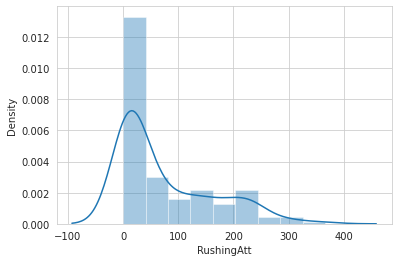

In [38]:
import seaborn as sns
sns.set_style('whitegrid')
sns.distplot(rb_df['RushingAtt']);

In [48]:
adp_df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/LearnPythonWithFantasyFootball/master/2022/06-Data%20Munging/02-ADP%20(PPR)%20-%20(2022.08.23).csv', index_col=0)

adp_df['ADP RANK'] = adp_df['AVG'].rank()

adp_df.head()

,Player,Team,Pos,ESPN,Fantrax,Sleeper,AVG,ADP RANK
Rank,,,,,,,,
1,Jonathan Taylor,IND,RB,1.0,1.0,1.0,1.0,1.0
2,Christian McCaffrey,CAR,RB,2.0,4.0,2.0,3.0,2.5
3,Austin Ekeler,LAC,RB,4.0,2.0,4.0,3.0,2.5
4,Cooper Kupp,LAR,WR,3.0,3.0,5.0,4.2,4.0
5,Derrick Henry,TEN,RB,5.0,6.0,3.0,4.8,5.0


In [54]:
adp_df_cutoff = adp_df[:100]

print(adp_df_cutoff.shape)

replacement_players = {
    'RB': '',
    'QB': '',
    'WR': '',
    'TE': ''
}

for _, row in adp_df_cutoff.iterrows(): 

      position = row['Pos'] # extract out the position and player value from each row as we loop through it
      player = row['Player']   

      if position in replacement_players: # if the position is in the dict's keys
          replacement_players[position] = player # set that player as the replacement player

df = df[['Player', 'Pos', 'Team', 'FantasyPoints']]
df.head()

(100, 8)


,Player,Pos,Team,FantasyPoints
0,Jonathan Taylor,RB,IND,343.34
1,Derrick Henry,RB,TEN,300.41
2,Austin Ekeler,RB,LAC,330.60
3,Christian McCaffrey,RB,CAR,343.43
4,Joe Mixon,RB,CIN,279.31


In [56]:
replacement_values = {}

for position, player_name in replacement_players.items():

    player = df.loc[df['Player'] == player_name]

    replacement_values[position] = player['FantasyPoints'].tolist()[0]

print(replacement_values)

{'RB': 123.85, 'QB': 386.06600000000003, 'WR': 202.22, 'TE': 145.49}


In [58]:
pd.set_option('chained_assignment', None)

df = df.loc[df['Pos'].isin(['QB', 'RB', 'WR', 'TE'])]

df['VOR'] = df.apply(
    lambda row: row['FantasyPoints'] - replacement_values.get(row['Pos']), axis=1

)

df.head()

,Player,Pos,Team,FantasyPoints,VOR
0,Jonathan Taylor,RB,IND,343.34,219.49
1,Derrick Henry,RB,TEN,300.41,176.56
2,Austin Ekeler,RB,LAC,330.60,206.75
3,Christian McCaffrey,RB,CAR,343.43,219.58
4,Joe Mixon,RB,CIN,279.31,155.46


In [59]:
pd.set_option('display.max_rows', None)

df['VOR Rank'] = df['VOR'].rank(ascending=False)
df.sort_values(by='VOR', ascending=False).head(100)

,Player,Pos,Team,FantasyPoints,VOR,VOR Rank
3,Christian McCaffrey,RB,CAR,343.430,219.580,1.0
0,Jonathan Taylor,RB,IND,343.340,219.490,2.0
2,Austin Ekeler,RB,LAC,330.600,206.750,3.0
1,Derrick Henry,RB,TEN,300.410,176.560,4.0
6,Alvin Kamara,RB,NO,284.340,160.490,5.0
170,Cooper Kupp,WR,LAR,361.560,159.340,6.0
7,Najee Harris,RB,PIT,280.740,156.890,7.0
4,Joe Mixon,RB,CIN,279.310,155.460,8.0
5,Dalvin Cook,RB,MIN,275.290,151.440,9.0
8,Leonard Fournette,RB,TB,268.700,144.850,10.0
